# Homework 10: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [139]:
simulateData <- function(n, beta_0, beta_1, beta_2, beta_3, beta_4, beta_5, beta_6, beta_7, beta_8, beta_9, beta_10){
    x <- rnorm(n, 0.5, 0.1)
    y_no_noise <- beta_0 + beta_1*x + beta_2*x^2 + beta_3*x^3 + beta_4*x^4 + beta_5+x^5 + beta_6*x^6 + beta_7*x^7 + beta_8*x^8 + beta_9*x^9 + beta_10*x^10 
    noise <- rnorm(n)
    y <- y_no_noise + noise
    
    print(paste('betas 1-10:', beta_0, beta_1, beta_2, beta_3, beta_4, beta_5, beta_6, beta_7, beta_8, beta_9, beta_10))
    
    return(data.frame(x=x, x2= x^2, x3= x^3, x4= x^4, x5= x^5, x6= x^6, x7= x^7, x8= x^8, x9=x^9, x10=x^10, y=y))
}

simulateddata <- simulateData(100, rnorm(1), rnorm(1), rnorm(1), rnorm(1), rnorm(1), rnorm(1), rnorm(1), rnorm(1), rnorm(1), rnorm(1), rnorm(1)) 
head(simulateddata)
dim(simulateddata)

#confused about where the x^4 - x^10 are supposed to come from.  Should I add them to my dataset here?  
#Even though they have no influence on Y (they are not used to directly predict Y in the simulate data function) in the question setup?  
#Or are they and their influence the model of increasing complexity added when I call regsubsets()?

#If I don't add these additional terms to the data frame, running regsubsets() with only x and y gives me the following error: 
# ERROR: attempt to set 'colnames' on an object with less than two dimensions



[1] "betas 1-10: 0.147541513038663 -0.734777021164568 0.575575634502797 -0.245696718476788 -1.52627662249353 0.651703302186767 -2.4310318305355 1.09695244054917 -2.71665102686323 2.50277598298214 1.53722566769358"


,x,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.4416730,0.19507508,0.08615940,0.038054286,0.01680755,0.0074234427,0.0032787345,1.448129e-03,6.395994e-04,2.824938e-04,0.93959315
2,0.5639906,0.31808545,0.17939722,0.101178356,0.05706365,0.0321833631,0.0181511159,1.023706e-02,5.773606e-03,3.256260e-03,0.87634317
3,0.2707749,0.07331904,0.01985296,0.005375682,0.00145560,0.0003941398,0.0001067232,2.889796e-05,7.824841e-06,2.118770e-06,0.78723978
4,0.5546002,0.30758133,0.17058465,0.094606276,0.05246866,0.0290991243,0.0161383788,8.950347e-03,4.963864e-03,2.752960e-03,0.80617133
5,0.5129221,0.26308913,0.13494424,0.069215888,0.03550236,0.0182099476,0.0093402854,4.790839e-03,2.457328e-03,1.260418e-03,-0.94719578
6,0.4485760,0.20122045,0.09026267,0.040489670,0.01816270,0.0081473497,0.0036547057,1.639413e-03,7.354015e-04,3.298835e-04,0.06910428


[1] 100  11

b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

For this you will need to install and load the _leaps_ library.

In [40]:
install.packages('leaps')


The downloaded binary packages are in
	/var/folders/9x/yng26nj50sq1bzz3bjr6bgkm0000gn/T//RtmpyiWnML/downloaded_packages


In [41]:
library(leaps)

In [140]:
regfit.full <- regsubsets(y~., simulateddata, nvmax= 10)
regfit.summary <- summary(regfit.full)
regfit.summary
attributes(regfit.summary)

#Subset selection object
#Call: regsubsets.formula(y ~ ., simulateddata, nvmax = 10)
#10 Variables  (and intercept)
#    Forced in Forced out
#x       FALSE      FALSE
#x2      FALSE      FALSE
#x3      FALSE      FALSE
#x4      FALSE      FALSE
#x5      FALSE      FALSE
#x6      FALSE      FALSE
#x7      FALSE      FALSE
#x8      FALSE      FALSE
#x9      FALSE      FALSE
#x10     FALSE      FALSE
#1 subsets of each size up to 10
#Selection Algorithm: exhaustive
#          x   x2  x3  x4  x5  x6  x7  x8  x9  x10
#1  ( 1 )  "*" " " " " " " " " " " " " " " " " " "
#2  ( 1 )  "*" "*" " " " " " " " " " " " " " " " "
#3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
#4  ( 1 )  "*" "*" "*" "*" " " " " " " " " " " " "
#5  ( 1 )  "*" "*" "*" "*" "*" " " " " " " " " " "
#6  ( 1 )  "*" "*" "*" "*" "*" "*" " " " " " " " "
#7  ( 1 )  "*" "*" "*" "*" "*" "*" "*" " " " " " "
#8  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" " " " "
#9  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" "*" " "
#10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*"

Warning message in leaps.exhaustive(a, really.big):
“XHAUST returned error code -999”


Subset selection object
Call: regsubsets.formula(y ~ ., simulateddata, nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          x   x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 )  "*" " " " " " " " " " " " " " " " " " "
2  ( 1 )  "*" "*" " " " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" "*" " " " " " " " " " " " "
5  ( 1 )  "*" "*" "*" "*" "*" " " " " " " " " " "
6  ( 1 )  "*" "*" "*" "*" "*" "*" " " " " " " " "
7  ( 1 )  "*" "*" "*" "*" "*" "*" "*" " " " " " "
8  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" " " " "
9  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" "*" " "
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*

$names
[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"   

$class
[1] "summary.regsubsets"

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

In [106]:
#These results feel fishy to me, although I'm not sure what I would be doing wrong. 

In [141]:
numvar = 1:length(regfit.summary$rss) #list of variable numbers 1-10 for x - x^10
allfalse = rep(FALSE,length(regfit.summary$rss)) #list of falses to start determining model of best fit
numvar
allfalse

[1]  1  2  3  4  5  6  7  8  9 10

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

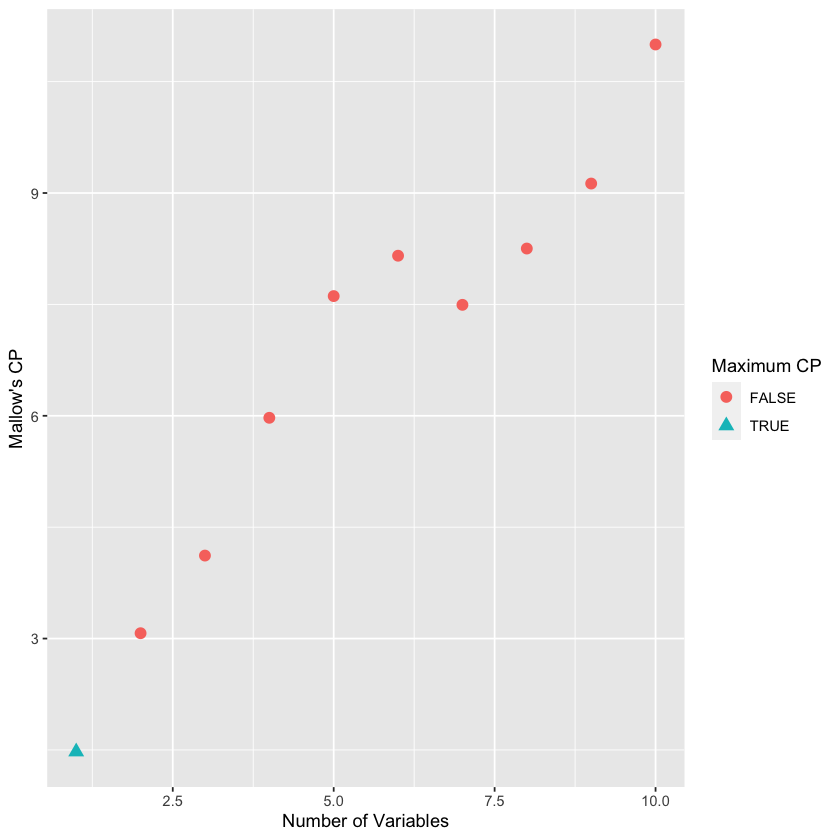

In [142]:
#Mallows' Cp

cp.df <- data.frame(numvar = numvar, cp <- regfit.summary$cp, mincp = allfalse)
cp.df$mincp[which.min(regfit.summary$cp)] <- TRUE
ggplot(cp.df,aes(x= numvar,y= cp,shape= mincp,col= mincp)) + 
     geom_point(size= 3) +  
     labs(x= "Number of Variables", y= "Mallow's CP", color= "Maximum CP", shape= "Maximum CP")


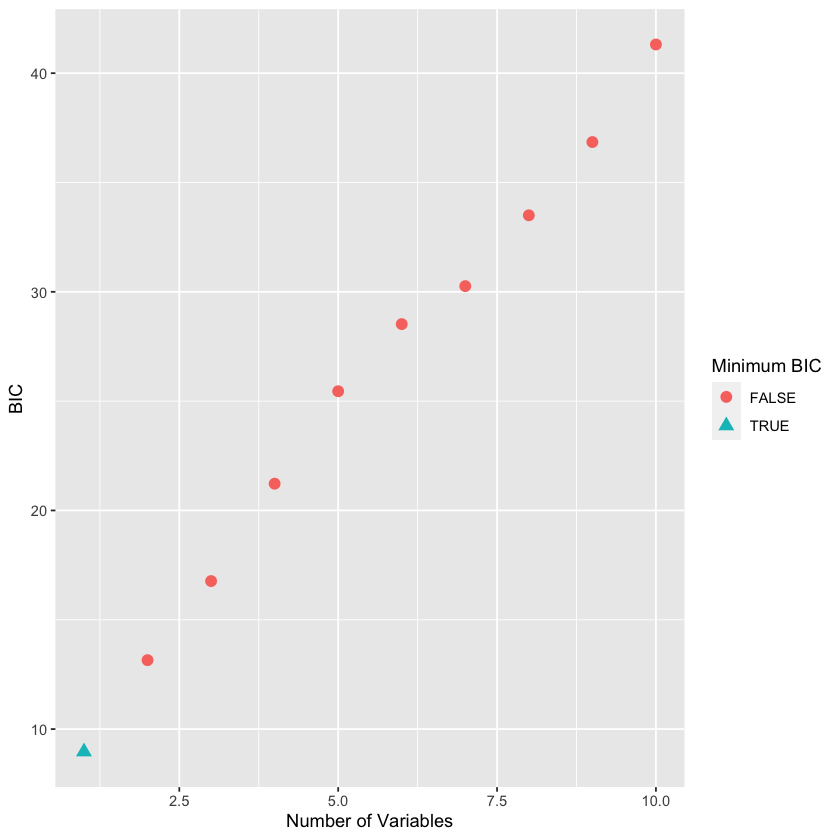

In [143]:
#BIC

bic.df <- data.frame(numvar= numvar, bic <- regfit.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(regfit.summary$bic)] <- TRUE
ggplot(bic.df,aes(x= numvar, y= bic, shape= minbic, col= minbic)) + 
    geom_point(size= 3) +  
    labs(x= "Number of Variables", y= "BIC", color= "Minimum BIC", shape= "Minimum BIC")

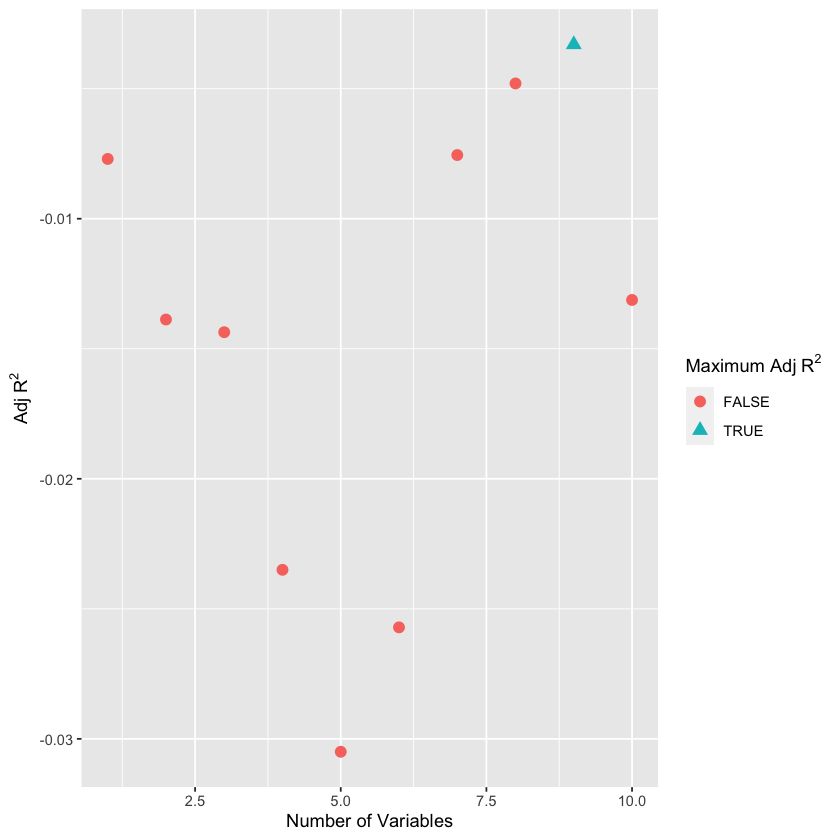

In [144]:
#R^2

adjr2.df <- data.frame(numvar= numvar, adjr2 <- regfit.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(regfit.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x= numvar,y= adjr2,shape= maxadjr2,col= maxadjr2)) + 
    geom_point(size= 3) +  
    labs(x= "Number of Variables", y= 'Adj'~R^2, color= 'Maximum Adj'~R^2, shape= 'Maximum Adj'~R^2)

> Based on the BIC and Mallow's CP, the model with 1 predictor variable (x) appears to be the most effective for predicting Y. However, the adjusted r^2 suggests that the model with 9 predictor variables is the best fit.

> coefficients below:

In [146]:
modelx <- lm(y~x, data = simulateddata)
modelx9 <- lm(y~x + x2 + x3 + x4 + x5 +x6 + x7 + x8 + x9, data = simulateddata)
coef(model)
coef(modelx9)

(Intercept)           x 
   1.854085   -2.631733

(Intercept)             x            x2            x3            x4 
    -25698.89     513079.00   -4500568.35   22771954.60  -73251827.70 
           x5            x6            x7            x8            x9 
 155342710.73 -217149989.48  192915132.11  -98823440.18   22238890.04

> oddly, the coefficient generated from this model doesn't match the coefficient that I generated for x^1 in my original data.  I feel like something is wrong here.

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

In [115]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [147]:
regfit.stepwiseforward <- regsubsets(y~., data= simulateddata, method = 'forward', nvmax = 10)
regfitforward.summary <- summary(regfit.stepwiseforward)
regfitforward.summary
attributes(regfitforward.summary)



Subset selection object
Call: regsubsets.formula(y ~ ., data = simulateddata, method = "forward", 
    nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          x   x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 )  "*" " " " " " " " " " " " " " " " " " "
2  ( 1 )  "*" "*" " " " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" "*" " " " " " " " " " " " "
5  ( 1 )  "*" "*" "*" "*" " " " " " " " " " " "*"
6  ( 1 )  "*" "*" "*" "*" "*" " " " " " " " " "*"
7  ( 1 )  "*" "*" "*" "*" "*" " " " " " " "*" "*"
8  ( 1 )  "*" "*" "*" "*" "*" " " " " "*" "*" "*"
9  ( 1 )  "*" "*" "*" "*" "*" " " "*" "*" "*" "*"
10  ( 1 ) "*" "*" "

$names
[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"   

$class
[1] "summary.regsubsets"

In [148]:
numvar = 1:length(regfitforward.summary$rss) #list of variable numbers 1-10 for x - x^10
allfalse = rep(FALSE,length(regfitforward.summary$rss)) #list of falses to start determining model of best fit
numvar
allfalse

[1]  1  2  3  4  5  6  7  8  9 10

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

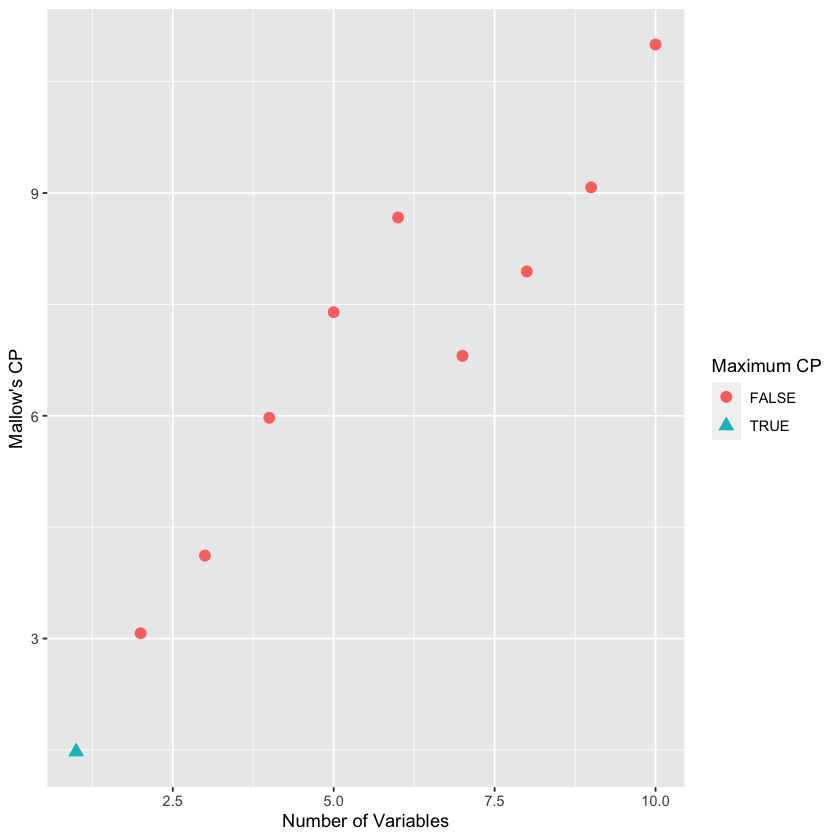

In [151]:
#Mallows' Cp

cp.df <- data.frame(numvar = numvar, cp <- regfitforward.summary$cp, mincp = allfalse)
cp.df$mincp[which.min(regfitforward.summary$cp)] <- TRUE
ggplot(cp.df,aes(x= numvar,y= cp,shape= mincp,col= mincp)) + 
     geom_point(size= 3) +  
     labs(x= "Number of Variables", y= "Mallow's CP", color= "Maximum CP", shape= "Maximum CP")

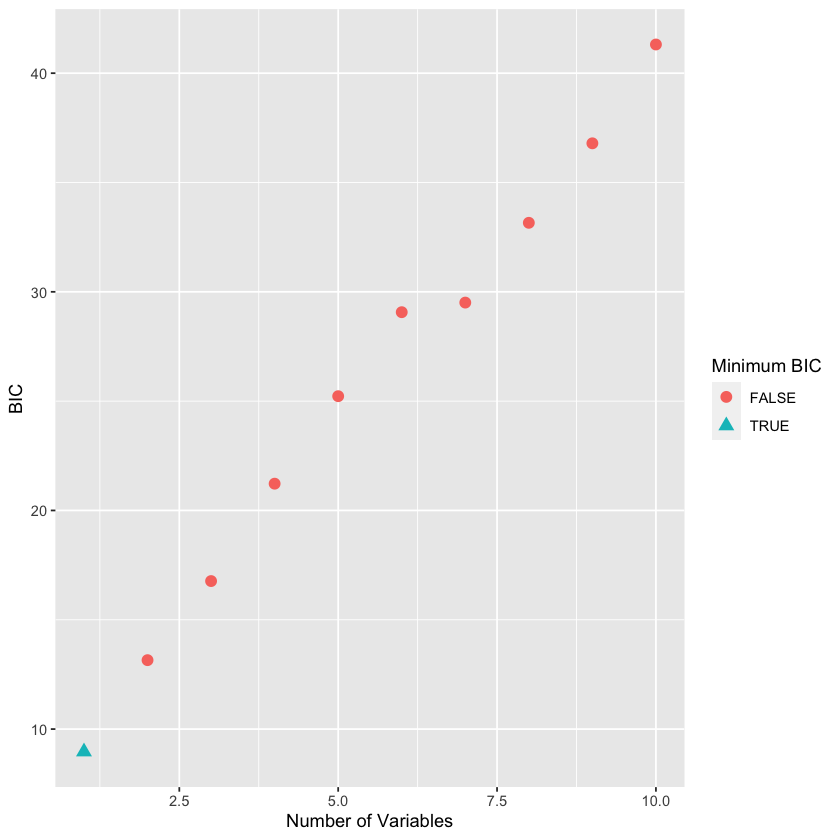

In [152]:
#BIC

bic.df <- data.frame(numvar= numvar, bic <- regfitforward.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(regfitforward.summary$bic)] <- TRUE
ggplot(bic.df,aes(x= numvar, y= bic, shape= minbic, col= minbic)) + 
    geom_point(size= 3) +  
    labs(x= "Number of Variables", y= "BIC", color= "Minimum BIC", shape= "Minimum BIC")

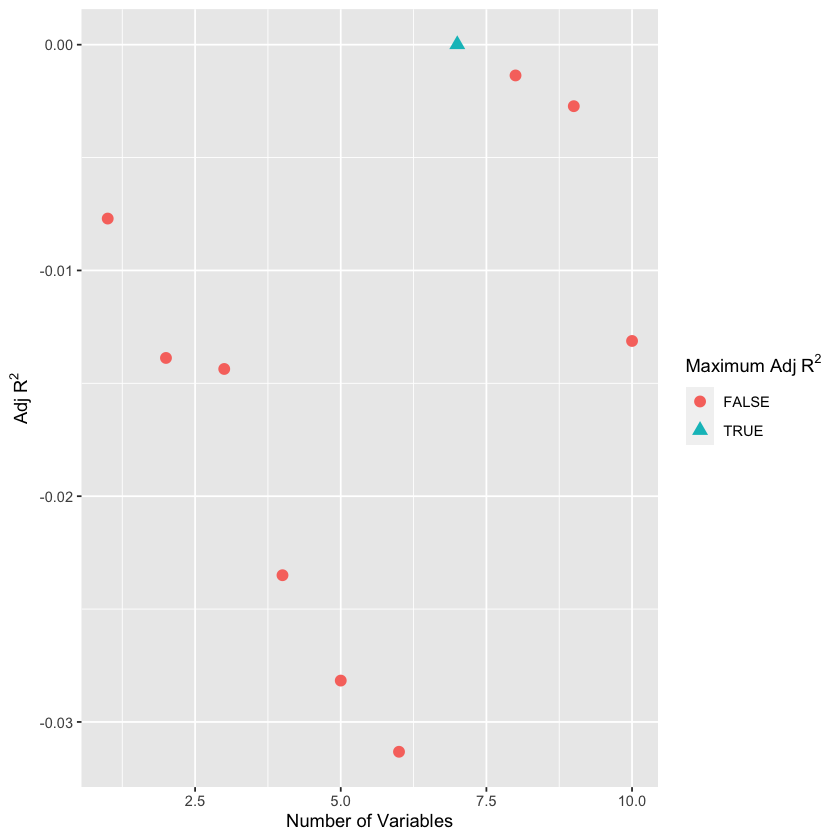

In [153]:
#R^2

adjr2.df <- data.frame(numvar= numvar, adjr2 <- regfitforward.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(regfitforward.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x= numvar,y= adjr2,shape= maxadjr2,col= maxadjr2)) + 
    geom_point(size= 3) +  
    labs(x= "Number of Variables", y= 'Adj'~R^2, color= 'Maximum Adj'~R^2, shape= 'Maximum Adj'~R^2)

>according to the Mallows' cp, and BIC, the model with one variable appears to best predict Y.  
According to the adjusted r^2, the model with 7 coefficients appears to be the best fit.
> coefficients below

In [154]:
forwardmodelx <- lm(y~x, data = simulateddata)
forwardmodelx7 <- lm(y~x + x2 + x3 + x4 + x5 + x9 + x10, data = simulateddata)
coef(forwardmodelx)
coef(forwardmodelx7)

(Intercept)           x 
  0.5608672  -0.5092049

(Intercept)           x          x2          x3          x4          x5 
  -1882.023   25937.343 -143609.522  403245.178 -582193.581  353257.968 
         x9         x10 
-197323.698  147161.195

b) Backwards stepwise selection:

In [155]:
regfit.stepwisebackward <- regsubsets(y~., data= simulateddata, method = 'backward', nvmax = 10)
regfitbackward.summary <- summary(regfit.stepwisebackward)
regfitbackward.summary
attributes(regfitbackward.summary)





Subset selection object
Call: regsubsets.formula(y ~ ., data = simulateddata, method = "backward", 
    nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          x   x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 )  " " " " " " " " "*" " " " " " " " " " "
2  ( 1 )  " " " " " " " " "*" "*" " " " " " " " "
3  ( 1 )  " " " " " " " " "*" "*" "*" " " " " " "
4  ( 1 )  " " " " " " " " "*" "*" "*" "*" " " " "
5  ( 1 )  " " " " " " " " "*" "*" "*" "*" "*" " "
6  ( 1 )  " " " " " " " " "*" "*" "*" "*" "*" "*"
7  ( 1 )  " " " " " " "*" "*" "*" "*" "*" "*" "*"
8  ( 1 )  " " " " "*" "*" "*" "*" "*" "*" "*" "*"
9  ( 1 )  " " "*" "*" "*" "*" "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*"

$names
[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"   

$class
[1] "summary.regsubsets"

In [156]:
numvar = 1:length(regfitbackward.summary$rss) #list of variable numbers 1-10 for x - x^10
allfalse = rep(FALSE,length(regfitbackward.summary$rss)) #list of falses to start determining model of best fit
numvar
allfalse

[1]  1  2  3  4  5  6  7  8  9 10

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

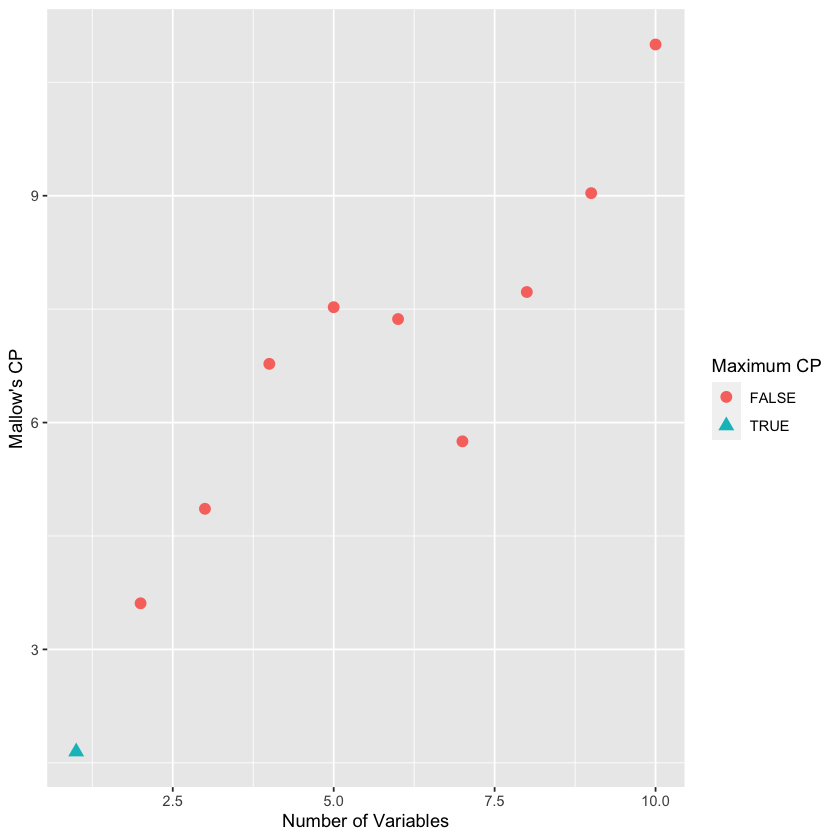

In [157]:
#Mallows' Cp

cp.df <- data.frame(numvar = numvar, cp <- regfitbackward.summary$cp, mincp = allfalse)
cp.df$mincp[which.min(regfitbackward.summary$cp)] <- TRUE
ggplot(cp.df,aes(x= numvar,y= cp,shape= mincp,col= mincp)) + 
     geom_point(size= 3) +  
     labs(x= "Number of Variables", y= "Mallow's CP", color= "Maximum CP", shape= "Maximum CP")

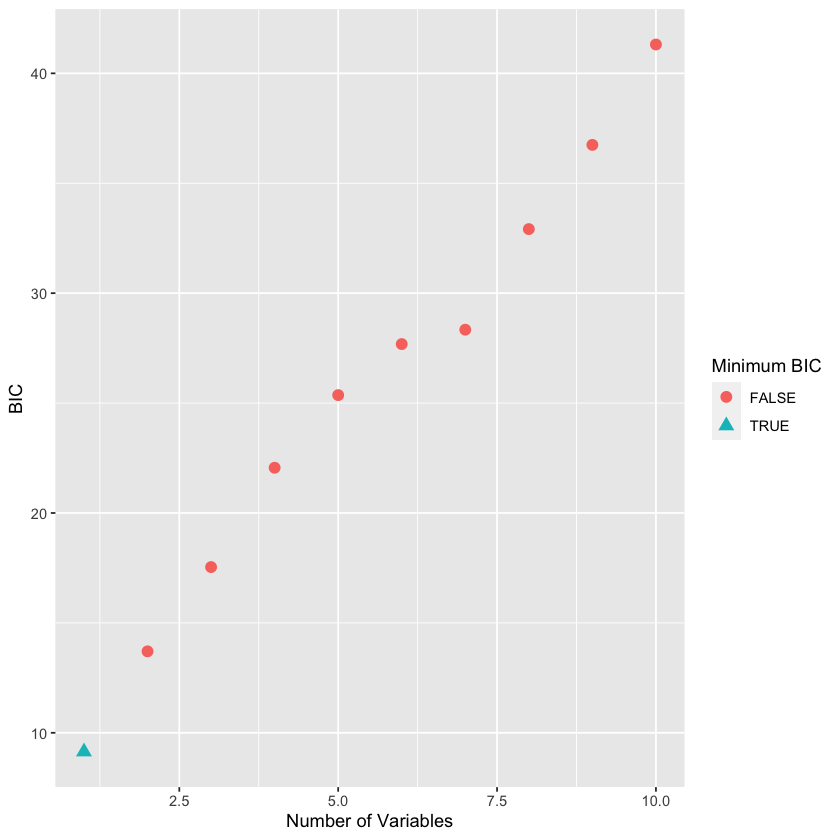

In [158]:
#BIC

bic.df <- data.frame(numvar= numvar, bic <- regfitbackward.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(regfitbackward.summary$bic)] <- TRUE
ggplot(bic.df,aes(x= numvar, y= bic, shape= minbic, col= minbic)) + 
    geom_point(size= 3) +  
    labs(x= "Number of Variables", y= "BIC", color= "Minimum BIC", shape= "Minimum BIC")

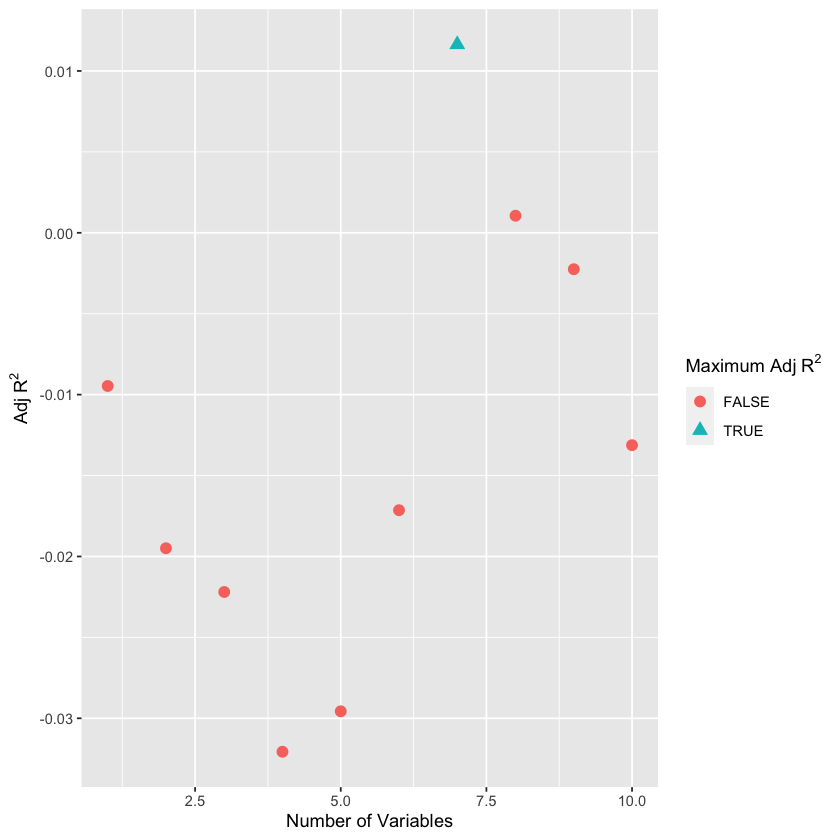

In [159]:
#R^2

adjr2.df <- data.frame(numvar= numvar, adjr2 <- regfitbackward.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(regfitbackward.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x= numvar,y= adjr2,shape= maxadjr2,col= maxadjr2)) + 
    geom_point(size= 3) +  
    labs(x= "Number of Variables", y= 'Adj'~R^2, color= 'Maximum Adj'~R^2, shape= 'Maximum Adj'~R^2)

>again, according to the Mallows' cp, and BIC, the model with one variable appears to best predict Y.  
According to the adjusted r^2, the model with 7 coefficients appears to be the best fit.
> coefficients below

In [160]:
backwardmodelx <- lm(y~ x5, data = simulateddata)
backwardmodelx7 <- lm(y~ x4 + x5 + x6 + x7 + x8 + x9 + x10, data = simulateddata)
coef(backwardmodelx)
coef(backwardmodelx7)

(Intercept)          x5 
  0.3353195  -0.6341963

(Intercept)            x4            x5            x6            x7 
-2.903346e+01  1.543962e+05 -1.550553e+06  6.611167e+06 -1.515316e+07 
           x8            x9           x10 
 1.957428e+07 -1.346448e+07  3.845040e+06

c) Compare your results from parts a and b with those of question 1.

> For all three methods (forward, backward, and best subset selection), BIC and Mallows' cp suggest that only a single variable provides the best model for predicting y, although all three tests suggest a different single variable is the most relevant (x, x5, and x respectively).  

> adjusted r^2 suggests that for best subset selection, 9 variables is the model with the best fit, while for both types of stepwise selection 7 variables is the best fit.  What's interesting about this is that the adjusted r^2 values for all three methods of subset selection are very low, ranging from ~-0.01 - +0.01.  

> Interestingly, the best subset selection method added variables of increasing importance in the order that they appear in the model, while the forward and backward stepwise selection indicated specific variables that best contributed to the model and were not necessarily in the order that they appear in the model.  

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [166]:
simulateData2 <- function(n, beta_0, beta_1, beta_2, beta_3, beta_4, beta_5, beta_6, beta_7, beta_8, beta_9, beta_10, 
                         beta_11, beta_12, beta_13, beta_14, beta_15, beta_16, beta_17, beta_18, beta_19, beta_20){
    x <- rnorm(n, 0.5, 0.1)
    y_no_noise <- beta_0 + beta_1*x + beta_2*x^2 + beta_3*x^3 + beta_4*x^4 + beta_5+x^5 + beta_6*x^6 + beta_7*x^7 + beta_8*x^8 + beta_9*x^9 + beta_10*x^10 + beta_11*x^11 + beta_12*x^12 + beta_13*x^13 + beta_14*x^14 + beta_15*x^15 + beta_16*x^16 + beta_17*x^17 + beta_18*x^18 + beta_19*x^19 + beta_20*x^20 
    noise <- rnorm(n)
    y <- y_no_noise + noise
    
    print(paste('betas intercept-20:', beta_0, beta_1, beta_2, beta_3, beta_4, beta_5, beta_6, beta_7, beta_8, beta_9, beta_10, beta_11, beta_12, beta_13, beta_14, beta_15, beta_16, beta_17, beta_18, beta_19, beta_20))
    
    return(data.frame(x=x, x2= x^2, x3= x^3, x4= x^4, x5= x^5, x6= x^6, x7= x^7, x8= x^8, x9=x^9, x10=x^10, x11=x^11, x12=x^12, x13=x^13, x14=x^14, x15=x^15, x16=x^16, x17=x^17, x18=x^18, x19=x^19, x20=x^20, y=y))
}

simulateddata2 <- simulateData2(1000, rnorm(1, 0), rnorm(1, 0), 0, rnorm(1, 0), rnorm(1, 0), 0, rnorm(1, 0), rnorm(1, 0), 0, rnorm(1, 0), rnorm(1, 0), rnorm(1, 0), 0, rnorm(1, 0), rnorm(1, 0), 0, rnorm(1, 0), rnorm(1, 0), 0, rnorm(1, 0), 0) 
head(simulateddata2)
dim(simulateddata2)



[1] "betas intercept-20: 0.67813182190906 -0.634983816998416 0 -0.106638748569651 -1.38678692897498 0 0.158731480209899 1.26593417379497 0 -0.72490921092824 -0.930866769589747 -1.6830716199558 0 -0.965150740111706 0.135824187730019 0 -0.731985077283581 -1.14350226647442 0 1.77338501376808 0"


,x,x2,x3,x4,x5,x6,x7,x8,x9,x10,⋯,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.4635974,0.2149226,0.09963755,0.04619171,0.02141436,0.009927642,0.004602429,0.002133674,0.0009891659,0.0004585748,⋯,9.855807e-05,4.569127e-05,2.118235e-05,9.820085e-06,4.552566e-06,2.110558e-06,9.784492e-07,4.536065e-07,2.102908e-07,1.4576618
2,0.5143706,0.2645771,0.13609071,0.07000107,0.03600649,0.018520682,0.009526495,0.004900149,0.0025204929,0.0012964675,⋯,3.430157e-04,1.764372e-04,9.075411e-05,4.668125e-05,2.401146e-05,1.235079e-05,6.352884e-06,3.267737e-06,1.680828e-06,-0.8437527
3,0.6664846,0.4442018,0.29605367,0.19731522,0.13150757,0.087647775,0.058415896,0.038933298,0.0259484453,0.0172942404,⋯,7.682132e-03,5.120023e-03,3.412417e-03,2.274323e-03,1.515802e-03,1.010259e-03,6.733218e-04,4.487587e-04,2.990908e-04,-0.5330434
4,0.5698584,0.3247386,0.18505498,0.10545513,0.06009449,0.034245345,0.019514996,0.011120784,0.0063372716,0.0036113472,⋯,1.172744e-03,6.682978e-04,3.808351e-04,2.170221e-04,1.236718e-04,7.047543e-05,4.016101e-05,2.288609e-05,1.304183e-05,1.6865007
5,0.5265221,0.2772256,0.14596540,0.07685401,0.04046534,0.021305897,0.011218026,0.005906539,0.0031099237,0.0016374437,⋯,4.539412e-04,2.390101e-04,1.258441e-04,6.625971e-05,3.488721e-05,1.836889e-05,9.671625e-06,5.092325e-06,2.681222e-06,1.2070173
6,0.4781505,0.2286279,0.10931857,0.05227073,0.02499328,0.011950550,0.005714162,0.002732229,0.0013064170,0.0006246640,⋯,1.428156e-04,6.828737e-05,3.265164e-05,1.561240e-05,7.465078e-06,3.569431e-06,1.706725e-06,8.160716e-07,3.902051e-07,0.9160478


[1] 1000   21

In [167]:
trainingset <- simulateddata2[1:100,]
testingset <- simulateddata2[101:1000,]
head(trainingset)
head(testingset)

,x,x2,x3,x4,x5,x6,x7,x8,x9,x10,⋯,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.4635974,0.2149226,0.09963755,0.04619171,0.02141436,0.009927642,0.004602429,0.002133674,0.0009891659,0.0004585748,⋯,9.855807e-05,4.569127e-05,2.118235e-05,9.820085e-06,4.552566e-06,2.110558e-06,9.784492e-07,4.536065e-07,2.102908e-07,1.4576618
2,0.5143706,0.2645771,0.13609071,0.07000107,0.03600649,0.018520682,0.009526495,0.004900149,0.0025204929,0.0012964675,⋯,3.430157e-04,1.764372e-04,9.075411e-05,4.668125e-05,2.401146e-05,1.235079e-05,6.352884e-06,3.267737e-06,1.680828e-06,-0.8437527
3,0.6664846,0.4442018,0.29605367,0.19731522,0.13150757,0.087647775,0.058415896,0.038933298,0.0259484453,0.0172942404,⋯,7.682132e-03,5.120023e-03,3.412417e-03,2.274323e-03,1.515802e-03,1.010259e-03,6.733218e-04,4.487587e-04,2.990908e-04,-0.5330434
4,0.5698584,0.3247386,0.18505498,0.10545513,0.06009449,0.034245345,0.019514996,0.011120784,0.0063372716,0.0036113472,⋯,1.172744e-03,6.682978e-04,3.808351e-04,2.170221e-04,1.236718e-04,7.047543e-05,4.016101e-05,2.288609e-05,1.304183e-05,1.6865007
5,0.5265221,0.2772256,0.14596540,0.07685401,0.04046534,0.021305897,0.011218026,0.005906539,0.0031099237,0.0016374437,⋯,4.539412e-04,2.390101e-04,1.258441e-04,6.625971e-05,3.488721e-05,1.836889e-05,9.671625e-06,5.092325e-06,2.681222e-06,1.2070173
6,0.4781505,0.2286279,0.10931857,0.05227073,0.02499328,0.011950550,0.005714162,0.002732229,0.0013064170,0.0006246640,⋯,1.428156e-04,6.828737e-05,3.265164e-05,1.561240e-05,7.465078e-06,3.569431e-06,1.706725e-06,8.160716e-07,3.902051e-07,0.9160478


,x,x2,x3,x4,x5,x6,x7,x8,x9,x10,⋯,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
101,0.5770098,0.3329404,0.19210986,0.11084928,0.063961123,0.036906197,0.021295239,0.0122875623,0.0070900443,0.0040910253,⋯,1.362067e-03,7.859263e-04,4.534872e-04,2.616666e-04,1.509842e-04,8.711936e-05,5.026873e-05,2.900555e-05,1.673649e-05,1.9596116
102,0.3898520,0.1519846,0.05925148,0.02309930,0.009005309,0.003510738,0.001368668,0.0005335779,0.0002080164,0.0000810956,⋯,1.232528e-05,4.805034e-06,1.873252e-06,7.302909e-07,2.847054e-07,1.109929e-07,4.327082e-08,1.686921e-08,6.576496e-09,-1.0994572
103,0.4650136,0.2162376,0.10055345,0.04675872,0.021743441,0.010110996,0.004701750,0.0021863779,0.0010166955,0.0004727772,⋯,1.022322e-04,4.753938e-05,2.210646e-05,1.027980e-05,4.780248e-06,2.222880e-06,1.033670e-06,4.806704e-07,2.235183e-07,0.1435378
104,0.5362844,0.2876010,0.15423592,0.08271432,0.044358402,0.023788720,0.012757520,0.0068416590,0.0036690751,0.0019676678,⋯,5.659032e-04,3.034851e-04,1.627543e-04,8.728260e-05,4.680830e-05,2.510256e-05,1.346211e-05,7.219521e-06,3.871717e-06,1.0572649
105,0.5775666,0.3335832,0.19266650,0.11127773,0.064270300,0.037120378,0.021439490,0.0123827335,0.0071518532,0.0041306715,⋯,1.377922e-03,7.958420e-04,4.596518e-04,2.654795e-04,1.533321e-04,8.855949e-05,5.114900e-05,2.954196e-05,1.706245e-05,-0.2523329
106,0.5566459,0.3098546,0.17247930,0.09600989,0.053443511,0.029749110,0.016559719,0.0092178995,0.0051311057,0.0028562089,⋯,8.850095e-04,4.926369e-04,2.742243e-04,1.526458e-04,8.496967e-05,4.729802e-05,2.632825e-05,1.465551e-05,8.157929e-06,1.8582214


b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

In [170]:
bestsubset.training <- regsubsets(y~., trainingset, nvmax = 20, really.big = TRUE)
training.summary <- summary(bestsubset.training)
training.summary
attributes(training.summary)



Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“8  linear dependencies found”
Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“nvmax reduced to  12”
Warning message in leaps.exhaustive(a, really.big):
“XHAUST returned error code -999”


Subset selection object
Call: regsubsets.formula(y ~ ., trainingset, nvmax = 20, really.big = TRUE)
20 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
x11     FALSE      FALSE
x12     FALSE      FALSE
x13     FALSE      FALSE
x14     FALSE      FALSE
x15     FALSE      FALSE
x16     FALSE      FALSE
x17     FALSE      FALSE
x18     FALSE      FALSE
x19     FALSE      FALSE
x20     FALSE      FALSE
1 subsets of each size up to 12
Selection Algorithm: exhaustive
          x   x2  x3  x4  x5  x6  x7  x8  x9  x10 x11 x12 x13 x14 x15 x16 x17
1  ( 1 )  "*" " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " "
2  ( 1 )  "*" "*" " " " " " " " " " " " " " " " " " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " "

$names
[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"   

$class
[1] "summary.regsubsets"

c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [ ]:
# WRITE YOUR CODE HERE



> *Write your response here* 
> 

I ran into a lot of problems while attempting this homework and I'm still not sure that I generated the data correctly.  I will keep working on this and get help this week if I can.  In the meantime, though, this was as much as I was able to finish.  

**DUE:** 5pm EST, April 15th, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*